In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#import data
data = pd.read_csv('salary_with_country.csv')
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
data.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [6]:
data.shape

(6704, 9)

In [7]:
data=data.dropna()

In [8]:
data.shape

(6698, 9)

In [9]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [10]:
data.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean
6703,6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Canada,Black


In [11]:
# Remove 'Senior' and 'Junior' from job titles
data['Job Title'] = data['Job Title'].str.replace('Senior', '').str.replace('Junior', '')

In [12]:
data.loc[154]

Unnamed: 0                            154
Age                                  37.0
Gender                             Female
Education Level                  Master's
Job Title               Marketing Analyst
Years of Experience                   9.0
Salary                            95000.0
Country                            Canada
Race                                White
Name: 154, dtype: object

In [13]:
data['Education Level'] = data['Education Level'].str.lower().str.rstrip("'s")
data['Job Title']=data['Job Title'].str.lower()

In [14]:
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,bachelor,software engineer,5.0,90000.0,UK,White
1,1,28.0,Female,master,data analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,phd,manager,15.0,150000.0,Canada,White
3,3,36.0,Female,bachelor,sales associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,master,director,20.0,200000.0,USA,Asian


In [15]:
nltk.download('punkt')
stemmer = PorterStemmer()
data['Job Title'] = data['Job Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))
data['Education Level'] = data['Education Level'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,bachelor,softwar engin,5.0,90000.0,UK,White
1,1,28.0,Female,master,data analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,phd,manag,15.0,150000.0,Canada,White
3,3,36.0,Female,bachelor,sale associ,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,master,director,20.0,200000.0,USA,Asian


In [17]:
selected_columns = ['Years of Experience', 'Education Level','Job Title', 'Country','Salary']
data = data[selected_columns]

In [18]:
data.head()

,Years of Experience,Education Level,Job Title,Country,Salary
0,5.0,bachelor,softwar engin,UK,90000.0
1,3.0,master,data analyst,USA,65000.0
2,15.0,phd,manag,Canada,150000.0
3,7.0,bachelor,sale associ,USA,60000.0
4,20.0,master,director,USA,200000.0


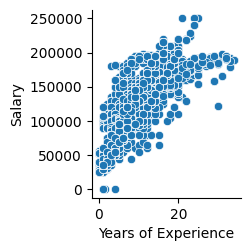

In [19]:
sns.pairplot(y_vars = 'Salary', x_vars = 'Years of Experience' ,data = data)

In [20]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [21]:
X[:5]

,Years of Experience,Education Level,Job Title,Country
0,5.0,bachelor,softwar engin,UK
1,3.0,master,data analyst,USA
2,15.0,phd,manag,Canada
3,7.0,bachelor,sale associ,USA
4,20.0,master,director,USA


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'bachelor'),
  Text(1, 0, 'master'),
  Text(2, 0, 'phd'),
  Text(3, 0, "bachelor 's degre"),
  Text(4, 0, "master 's degre"),
  Text(5, 0, 'high school')])

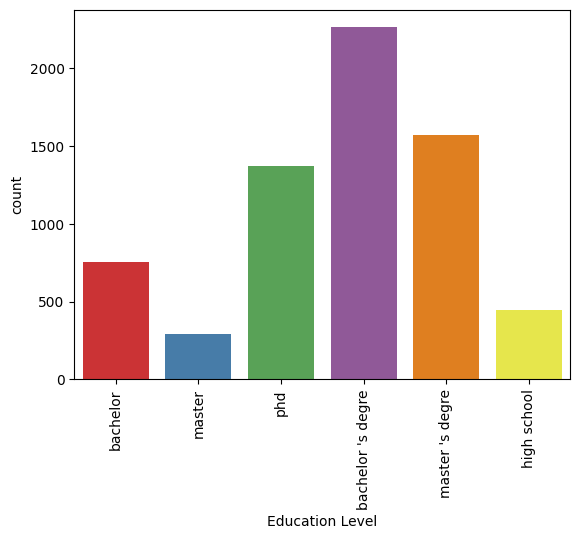

In [22]:
import matplotlib.pyplot as plt
sns.countplot(x = 'Education Level', data = data, palette='Set1')
plt.xticks(rotation=90)

<Axes: xlabel='Years of Experience', ylabel='Count'>

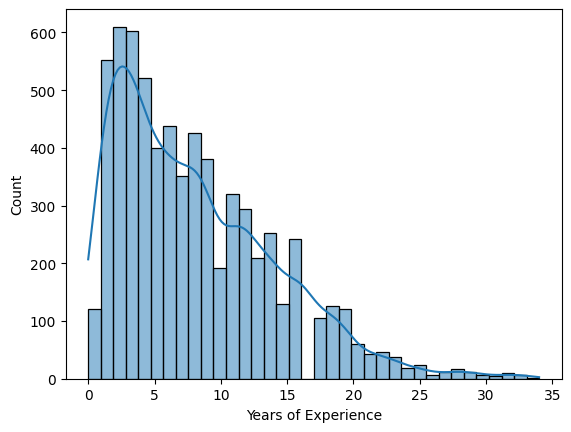

In [23]:
sns.histplot(x = 'Years of Experience', data = data ,kde=True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

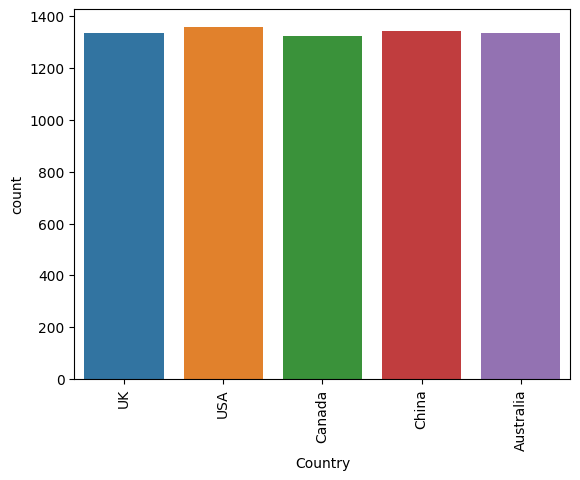

In [24]:
sns.countplot(x='Country', data=data)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Education Level vs Salary')

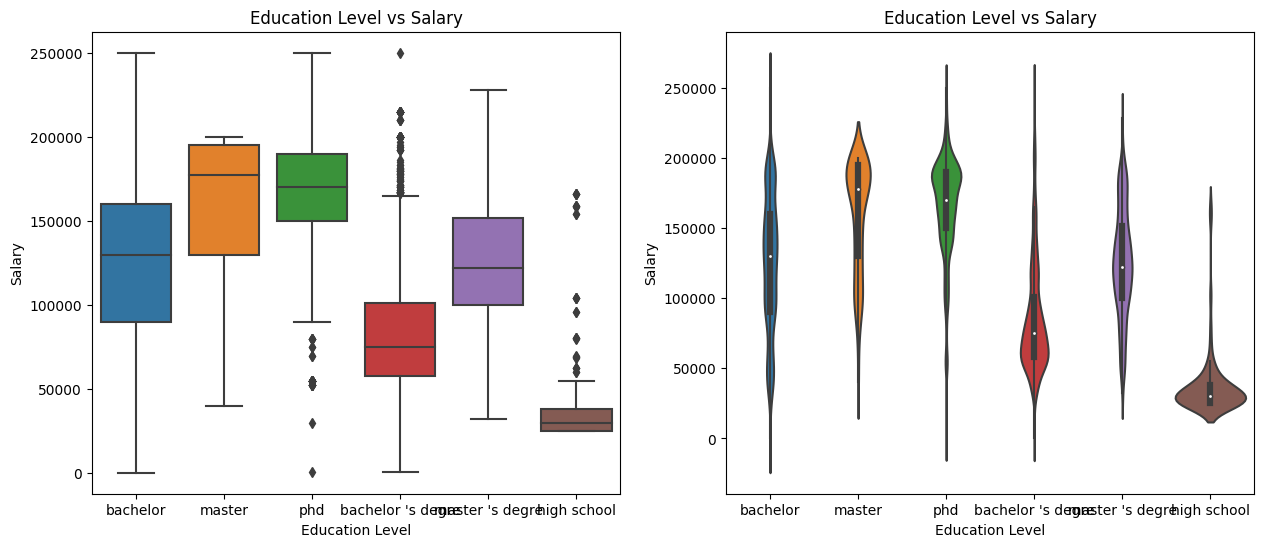

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = data, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = data, ax=ax[1]).set_title('Education Level vs Salary')

In [26]:
# Preprocess categorical feature 'Education Level'
categorical_features = ['Education Level','Job Title','Country']
numeric_features = ['Years of Experience']

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [28]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# Combine preprocessing and modeling steps into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=100))
])

In [30]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
X_train.shape

(4688, 4)

In [32]:
X_test.shape

(2010, 4)

In [33]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Years of Experience']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education Level',
                                                   'Job Title', 'Country'])])),
                ('model', RandomForestRegressor(random_state=100))])

In [34]:
import joblib
joblib.dump(pipeline, 'trained_with_country.pkl')

['trained_with_country.pkl']

In [35]:
# Predict salaries for the test set
y_pred = pipeline.predict(X_test)

In [36]:
# Print the R-squared score (Coefficient of Determination)
print(f'R-squared score: {pipeline.score(X_test, y_test):.2f}')

R-squared score: 0.96


In [37]:
# User input: Experience and Education Level
user_experience = float(input("Enter years of experience: "))
user_education = input("Enter education level: ")
job_title=input("Enter job title : ")
country_inp=input("Enter country Name: ")

Enter years of experience: 5
Enter education level: masters
Enter job title : data analysts
Enter country Name: Canada


In [38]:
stemmed_job_title= ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(job_title)])
stemmed_user_education= ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(user_education)])
update_uder_education=stemmed_user_education.lower().rstrip("s")
update_job_title=stemmed_job_title.lower()
updated_country=country_inp.upper()

In [39]:
# Create a DataFrame for user input
user_data = pd.DataFrame({'Years of Experience': [user_experience],
                          'Education Level': [update_uder_education],
                          'Job Title': [update_job_title],
                          'Country':[updated_country]})

In [40]:
user_salary_pred = pipeline.predict(user_data)

In [41]:
print(f"Predicted Salary: {user_salary_pred[0]:.2f} Rupees")

Predicted Salary: 122623.87 Rupees


In [42]:
data['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)